In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
M42 = pd.read_csv("M42_convert.csv")
NGC2174_cal_3_4 = pd.read_csv("NGC2174_calstar_3_4.csv")
NGC2174_cal_3_16 = pd.read_csv("NGC2174_calstar_3_16.csv")
NGC2174_tau_3_4 = pd.read_csv("NGC2174_tau_3_4.csv")
NGC2174_tau_3_16 = pd.read_csv("NGC2174_tau_3_16_2.csv")

#mag of M42 cal = 9.5
#mag of NGC2174 cal = 9.8

In [39]:
M42["signal"] = M42["Star[DN]"] / M42["Exposure"]
M42["convertfactor"] = ( M42["f_0"] * 10**(-9.5/2.5) ) / M42["signal"]

In [40]:
new_M42 = pd.concat([M42.iloc[:,0], M42.iloc[:,-1]], axis=1)

In [42]:
M42

,Image # - M42/M43,CENTALT,Elevation Angle,Filter,Exposure,STD,Sec(z),Star[DN],Star Uncertainty,FWHM,radii,f_0,signal,convertfactor
0,154,33.522761,56.477239,R,45,16.45,1.810714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,153,33.627465,56.372535,R,45,16.48,1.805736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152,33.731373,56.268627,R,45,16.27,1.800829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150,33.999871,56.000129,G,45,13.95,1.788298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,34.102145,55.897855,G,45,13.57,1.783580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,148,34.203854,55.796146,G,45,14.25,1.778919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,146,34.467580,55.532420,B,45,14.98,1.766972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,145,34.567363,55.432637,B,45,14.36,1.762503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,144,34.666632,55.333368,B,45,13.84,1.758085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,142,35.443813,54.556187,Hb,300,14.95,1.724422,595325.0,1187.520,7.82,13-18-23,9.840000e-08,1984.416667,7.858909e-15


In [69]:
STD = [12.07, 12.69, 26.53, 8.83]
STD_arr = np.array(STD)
f0 = [1.31e-07, 9.84e-08, 4.22e-07, 1.63e-07]
f0_arr = np.array(f0)
time = [300,300,300,300]
time_arr = np.array(time)
signal = (STD_arr * 5)/time_arr


Ha_LL = ((f0_arr[0] * 10**(-9.5/2.5)) / signal[0])
Hb_LL = ((f0_arr[1] * 10**(-9.5/2.5)) / signal[1])
OIII_LL = ((f0_arr[2] * 10**(-9.5/2.5)) / signal[2])
SII_LL = ((f0_arr[3] * 10**(-9.5/2.5)) / signal[3])

In [70]:
print(f'{Ha_LL}, {Hb_LL}, {OIII_LL}, {SII_LL}')

1.0320845478661439e-10, 7.373687476982205e-11, 1.5126082032836567e-10, 1.7554083150928307e-10


### For 3/4

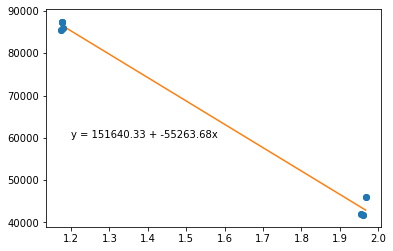

In [5]:
#OIII
secz = NGC2174_cal_3_4["sec(z)"].iloc[:7]
stellar_signal = NGC2174_cal_3_4["Star_DN"].iloc[:7]  
errorbar = NGC2174_cal_3_4["Uncertainty"].iloc[:7]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.2, 60000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

OIII_f0 = b

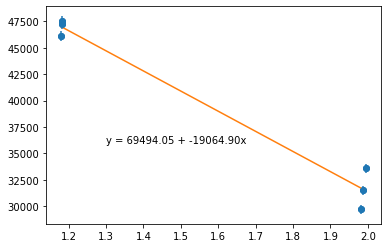

In [6]:
#Halpha
secz = NGC2174_cal_3_4["sec(z)"].iloc[7:13]
stellar_signal = NGC2174_cal_3_4["Star_DN"].iloc[7:13]  
errorbar = NGC2174_cal_3_4["Uncertainty"].iloc[7:13]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.3, 36000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Halpha_f0 = b

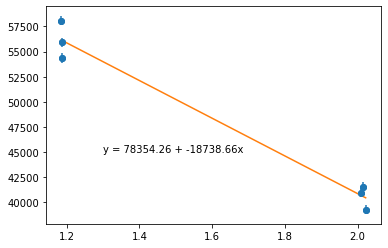

In [7]:
#SII
secz = NGC2174_cal_3_4["sec(z)"].iloc[13:19]
stellar_signal = NGC2174_cal_3_4["Star_DN"].iloc[13:19]  
errorbar = NGC2174_cal_3_4["Uncertainty"].iloc[13:19]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.3, 45000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

SII_f0 = b

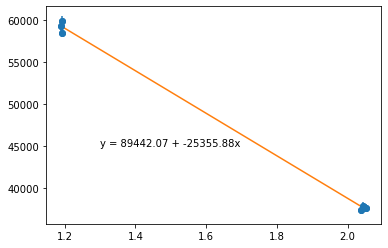

In [8]:
#Hbeta
secz = NGC2174_cal_3_4["sec(z)"].iloc[19:25]
stellar_signal = NGC2174_cal_3_4["Star_DN"].iloc[19:25]  
errorbar = NGC2174_cal_3_4["Uncertainty"].iloc[19:25]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.3, 45000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10) 

Hbeta_f0 = b

In [9]:
OIII_f = 4.22e-07
Halpha_f = 1.31e-07
SII_f = 1.63e-07
Hbeta_f = 9.84e-08

cal_mag = 9.8

In [10]:
OIII_conv = ( OIII_f * 10**(-cal_mag/2.5) ) / (OIII_f0/30)
Halpha_conv = ( Halpha_f * 10**(-cal_mag/2.5) ) / (Halpha_f0/30)
SII_conv = ( SII_f * 10**(-cal_mag/2.5) ) / (SII_f0/30)
Hbeta_conv = ( Hbeta_f * 10**(-cal_mag/2.5) ) / (Hbeta_f0/30)

print("On the night of 3/4:")
print(f"The conversion factor for OIII is {OIII_conv:.3e}")
print(f"The conversion factor for Halpha is {Halpha_conv:.3e}")
print(f"The conversion factor for SII is {SII_conv:.3e}")
print(f"The conversion factor for Hbeta is {Hbeta_conv:.3e}")

On the night of 3/4:
The conversion factor for OIII is 1.004e-14
The conversion factor for Halpha is 6.799e-15
The conversion factor for SII is 7.503e-15
The conversion factor for Hbeta is 3.968e-15


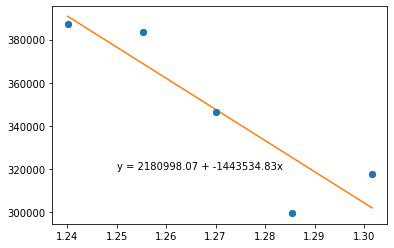

In [11]:
#OIII
secz = NGC2174_tau_3_4["Sec(z)"].iloc[16:21]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[16:21]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[16:21]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.25, 320000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

OIII_tau0 = abs(a/b)

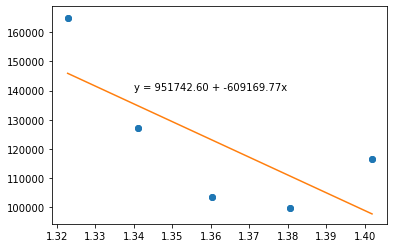

In [12]:
#Halpha
secz = NGC2174_tau_3_4["Sec(z)"].iloc[6:11]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[6:11]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[6:11]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.34, 140000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Halpha_tau0 = abs(a/b)

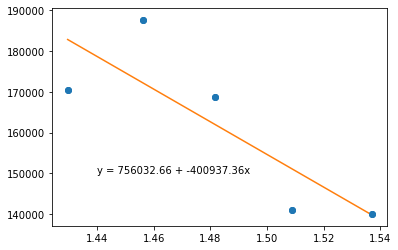

In [13]:
#SII
secz = NGC2174_tau_3_4["Sec(z)"].iloc[27:32]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[27:32]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[27:32]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.44, 150000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

SII_tau0 = abs(a/b)

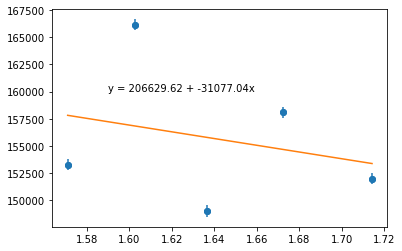

In [14]:
#Hbeta
secz = NGC2174_tau_3_4["Sec(z)"].iloc[11:16]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[11:16]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[11:16]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.59, 160000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Hbeta_tau0 = abs(a/b)

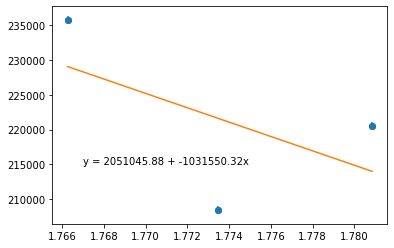

In [15]:
#Blue
secz = NGC2174_tau_3_4["Sec(z)"].iloc[:3]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[:3]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[:3]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.767, 215000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Blue_tau0 = abs(a/b)

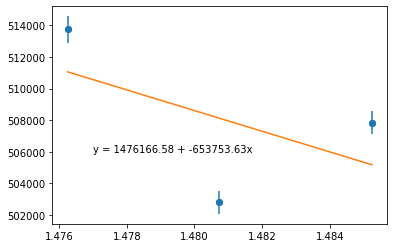

In [16]:
#Green
secz = NGC2174_tau_3_16["Sec(z)"].iloc[3:6]
stellar_signal = NGC2174_tau_3_16["Star [DN]"].iloc[3:6]  
errorbar = NGC2174_tau_3_16["Star Uncertainty"].iloc[3:6]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.477, 506000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Green_tau0 = abs(a/b)

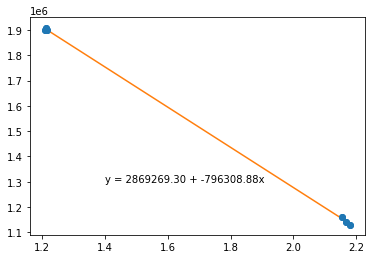

In [17]:
#Red
secz = NGC2174_tau_3_4["Sec(z)"].iloc[21:27]
stellar_signal = NGC2174_tau_3_4["Star [DN]"].iloc[21:27]  
errorbar = NGC2174_tau_3_4["Star Uncertainty"].iloc[21:27]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.4, 1.3e6, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Red_tau0 = abs(a/b)

In [18]:
OIII_secz0 = 1.240119705
Halpha_secz0 = 1.322792928
SII_secz0 = 1.429610985
Hbeta_secz0 = 1.57105529
L_secz0 = 1.023106953
B_secz0 = 1.046789283
G_secz0 = 1.47625206
R_secz0 = 1.84114776

In [22]:
print("For NGC2174 on the night of 3/4, correcting for atmosphere factor is:")
print(f"factor for OIII is {(1-(OIII_tau0*OIII_secz0)):.3e}")
print(f"factor for Halpha is {(1-(Halpha_tau0*Halpha_secz0)):.3e}")
print(f"factor for SII is {(1-(SII_tau0*SII_secz0)):.3e}")
print(f"factor for Hbeta is {(1-(Hbeta_tau0*Hbeta_secz0)):.3e}")
print()
print("On both nights, correcting for atmosphere factor is:")
print(f"factor for B is {(1-(Blue_tau0*B_secz0)):.3e}")
print(f"factor for G is {(1-(Green_tau0*G_secz0)):.3e}")
print(f"factor for R is {(1-(Red_tau0*R_secz0)):.3e}")

For NGC2174 on the night of 3/4, correcting for atmosphere factor is:
factor for OIII is 1.792e-01
factor for Halpha is 1.533e-01
factor for SII is 2.419e-01
factor for Hbeta is 7.637e-01

On both nights, correcting for atmosphere factor is:
factor for B is 4.735e-01
factor for G is 3.462e-01
factor for R is 4.890e-01


In [23]:
#NGC2174_tau_3_4

### For 3/16

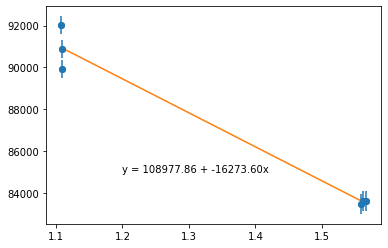

In [24]:
#OIII
secz = NGC2174_cal_3_16["Sec(z)"].iloc[:6]
stellar_signal = NGC2174_cal_3_16["Star [DN]"].iloc[:6]  
errorbar = NGC2174_cal_3_16["Star Uncertainty"].iloc[:6]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.2, 85000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

OIII_f0 = b

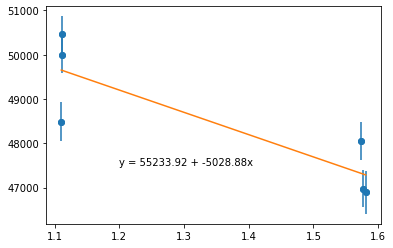

In [25]:
#Halpha
secz = NGC2174_cal_3_16["Sec(z)"].iloc[6:12]
stellar_signal = NGC2174_cal_3_16["Star [DN]"].iloc[6:12]  
errorbar = NGC2174_cal_3_16["Star Uncertainty"].iloc[6:12]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.2, 47500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Halpha_f0 = b

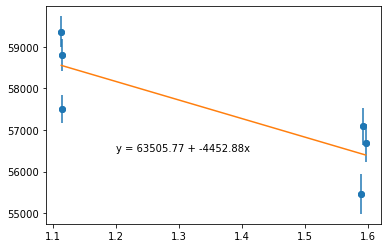

In [26]:
#SII
secz = NGC2174_cal_3_16["Sec(z)"].iloc[12:18]
stellar_signal = NGC2174_cal_3_16["Star [DN]"].iloc[12:18]  
errorbar = NGC2174_cal_3_16["Star Uncertainty"].iloc[12:18]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.2, 56500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

SII_f0 = b

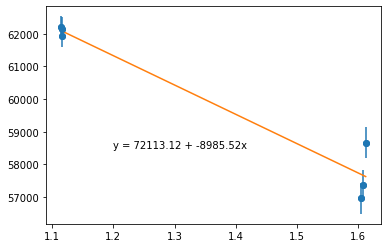

In [27]:
#Hbeta
secz = NGC2174_cal_3_16["Sec(z)"].iloc[18:24]
stellar_signal = NGC2174_cal_3_16["Star [DN]"].iloc[18:24]  
errorbar = NGC2174_cal_3_16["Star Uncertainty"].iloc[18:24]
  
a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.2, 58500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Hbeta_f0 = b

In [28]:
OIII_conv = ( OIII_f * 10**(-cal_mag/2.5) ) / (OIII_f0/30)
Halpha_conv = ( Halpha_f * 10**(-cal_mag/2.5) ) / (Halpha_f0/30)
SII_conv = ( SII_f * 10**(-cal_mag/2.5) ) / (SII_f0/30)
Hbeta_conv = ( Hbeta_f * 10**(-cal_mag/2.5) ) / (Hbeta_f0/30)

print("On the night of 3/16:")
print(f"The conversion factor for OIII is {OIII_conv:.3e}")
print(f"The conversion factor for Halpha is {Halpha_conv:.3e}")
print(f"The conversion factor for SII is {SII_conv:.3e}")
print(f"The conversion factor for Hbeta is {Hbeta_conv:.3e}")

On the night of 3/16:
The conversion factor for OIII is 1.397e-14
The conversion factor for Halpha is 8.554e-15
The conversion factor for SII is 9.258e-15
The conversion factor for Hbeta is 4.922e-15


In [29]:
#NGC2174_tau_3_16

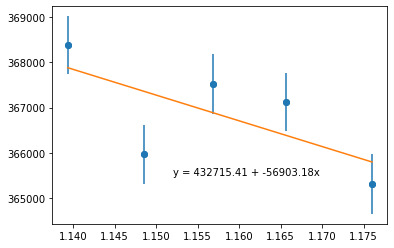

In [30]:
#OIII
secz = NGC2174_tau_3_16["Sec(z)"].iloc[16:21]
stellar_signal = NGC2174_tau_3_16["Star [DN]"].iloc[16:21]  
errorbar = NGC2174_tau_3_16["Star Uncertainty"].iloc[16:21]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.152, 365500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

OIII_tau0 = abs(a/b)

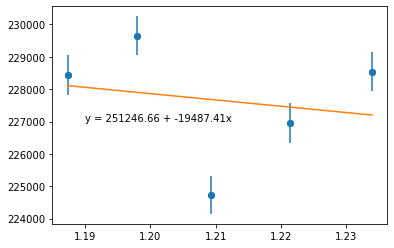

In [31]:
#Halpha
secz = NGC2174_tau_3_16["Sec(z)"].iloc[6:11]
stellar_signal = NGC2174_tau_3_16["Star [DN]"].iloc[6:11]  
errorbar = NGC2174_tau_3_16["Star Uncertainty"].iloc[6:11]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.19, 227000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Halpha_tau0 = abs(a/b)

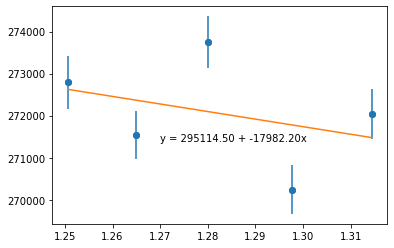

In [32]:
#SII
secz = NGC2174_tau_3_16["Sec(z)"].iloc[24:29]
stellar_signal = NGC2174_tau_3_16["Star [DN]"].iloc[24:29]  
errorbar = NGC2174_tau_3_16["Star Uncertainty"].iloc[24:29]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.27, 271400, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

SII_tau0 = abs(a/b)

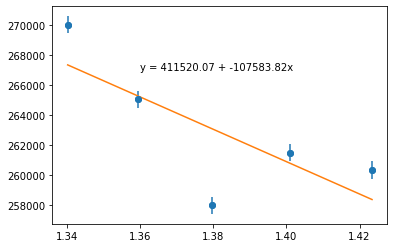

In [33]:
#Hbeta
secz = NGC2174_tau_3_16["Sec(z)"].iloc[11:16]
stellar_signal = NGC2174_tau_3_16["Star [DN]"].iloc[11:16]  
errorbar = NGC2174_tau_3_16["Star Uncertainty"].iloc[11:16]

a, b = np.polyfit(secz, stellar_signal, 1)
plt.scatter(secz, stellar_signal)
plt.errorbar(secz, stellar_signal, yerr=errorbar, fmt="o")
plt.plot(secz, a*(secz)+b) 
plt.text(1.36, 267000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Hbeta_tau0 = abs(a/b)

In [34]:
OIII_secz0 = 1.139329232
Halpha_secz0 = 1.187294094
SII_secz0 = 1.250580259
Hbeta_secz0 = 1.340230424

In [36]:
print("For NGC2174 on the night of 3/16, correcting for atmosphere factor is:")
print(f"factor for OIII is {(1-(OIII_tau0*OIII_secz0)):.3e}")
print(f"factor for Halpha is {(1-(Halpha_tau0*Halpha_secz0)):.3e}")
print(f"factor for SII is {(1-(SII_tau0*SII_secz0)):.3e}")
print(f"factor for Hbeta is {(1-(Hbeta_tau0*Hbeta_secz0)):.3e}")

For NGC2174 on the night of 3/16, correcting for atmosphere factor is:
factor for OIII is 8.502e-01
factor for Halpha is 9.079e-01
factor for SII is 9.238e-01
factor for Hbeta is 6.496e-01
